In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set the seed to be reproductive
np.random.seed(8675309)

In [3]:
# rcParams: rc settings in python 
# for controlling matplotlibrc configuration file

# Change the direction of ticks towards out
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [4]:
#Create grid and multivariate normal
delta = 0.1                     # define step length
x = np.arange(-5.0, 5.0, delta) # define the interval range for x
y = np.arange(-5.0, 5.0, delta) # define the interval range for y
X, Y = np.meshgrid(x, y)        # create grid

# Resize the size of X
pos = np.empty(X.shape + (2,))  
pos[:, :, 0] = X; pos[:, :, 1] = Y

Z = multivariate_normal( [1.0,1.0], [[2, -1], [-1, 1]])

### 1. Visualizing the Multivariate Gaussian (Normal) Probability Density Function

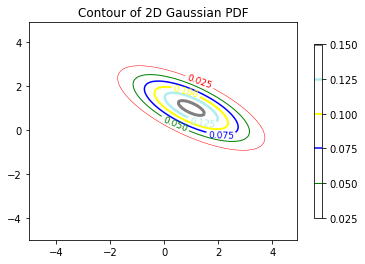

In [5]:
# Plot the contours of 2D Gaussian PDF
plt.figure()
CS = plt.contour(X, Y, Z.pdf(pos), 6,
                 linewidths = np.arange(.5, 4, .5),
                 colors = ('r','green','blue',(1, 1, 0),'#afeeee','0.5')
                 )
plt.clabel(CS, fontsize = 9, inline = 1)
plt.title('Contour of 2D Gaussian PDF')
CB = plt.colorbar(CS, shrink=0.8, extend='both')

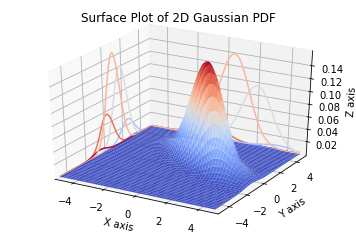

In [6]:
# Plot the surface.
# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, 
                Z.pdf(pos), 
                cmap = cm.coolwarm, 
                linewidth = 0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
cset = ax.contour(X, Y, 
                  Z.pdf(pos), 
                  zdir = 'x', 
                  offset = -5, 
                  cmap = cm.coolwarm)
cset = ax.contour(X, Y, 
                  Z.pdf(pos),
                  zdir = 'y', 
                  offset = 5, 
                  cmap = cm.coolwarm)
plt.title('Surface Plot of 2D Gaussian PDF')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

### 2. Generate Synthetic Data for Classification

In [7]:
# Set required value to parameters
mean1 = [0.0,0.0]
cov1 = [[1,0.1],[0.1,1]]
mean2 = [1.0,1.0]
cov2 = [[1.0,-0.1],[-0.1,1.0]]

# Initialize the matrix and predefine the size of the input dataset
syntheticData21 = np.zeros((100,2))
syntheticData22 = np.zeros((100,2))

# Set the seed to be reproductive
np.random.seed(8675309)

# Generate 100 random data points 
for ii in range(0,100):
    syntheticData21[ii,:] = np.random.multivariate_normal(mean1,cov1,size=(1,))
    syntheticData22[ii,:] = np.random.multivariate_normal(mean2,cov2,size=(1,))

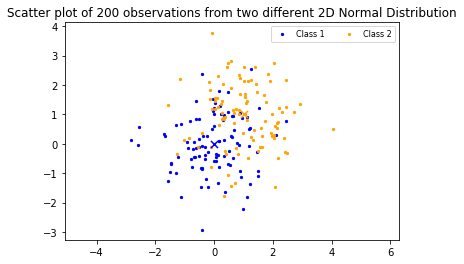

In [8]:
# Scatter Plot of two datasets  
fig2, ax2 = plt.subplots()
sc21= ax2.scatter(syntheticData21[:,0], 
                  syntheticData21[:,1], 
                  marker='o', 
                  color='blue',
                  s=5)
sc22=ax2.scatter(syntheticData22[:,0], 
                 syntheticData22[:,1], 
                 marker='o', 
                 color='orange',
                 s=5)
# Plot the mixture centers as Xs
ax2.scatter( 1, 1, marker='x', color='orange',s=50)

ax2.scatter( 0, 0, marker='x', color='blue',s=50)
plt.axis('equal')
plt.legend((sc21, sc22),
           ('Class 1', 'Class 2'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot of 200 observations from two different 2D Normal Distribution')
plt.show()

### 3. Generate Synthetic Data for Regression

In [9]:
# Initialize and predefine the size of input datas
syntheticData31 = np.zeros((100,1))
syntheticData32 = np.zeros((100,1))
syntheticData33 = np.zeros((100,1))

# Set the seed to be reproductive
np.random.seed(8675309)

# Generate 100 random data points
for ii in range(0,100):
    syntheticData31[ii] = np.random.uniform(-5,5,1)
    syntheticData32[ii] = 0.1*syntheticData31[ii,:]**3 + 3
    syntheticData33[ii] = syntheticData32[ii] + np.random.standard_normal(1)

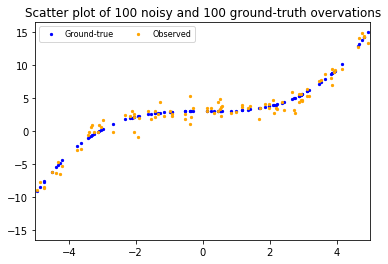

In [10]:
# Scatter Plot of the Ground-true data compared with the noisy data
fig3, ax3 = plt.subplots()
sc31= ax3.scatter(syntheticData31, 
                  syntheticData32, 
                  marker='o', 
                  color='blue',
                  s = 5)
sc32=ax3.scatter(syntheticData31, 
                 syntheticData33, 
                 marker='o', 
                 color='orange',s = 5)
plt.legend((sc31, sc32),
           ('Ground-true','Observed'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
ax3.set_xlim(-5, 5)
ax3.set_ylim(-16.5, 16.5)
plt.title('Scatter plot of 100 noisy and 100 ground-truth overvations')

plt.show()

### 4. Standardizing Data

In [11]:
# Set required values to parameters
mean4 =[2.0,5.0]
cov4 = [[1,0.-0.1],[-0.1,1]]

# Initialize and predefine the input data
syntheticData41 = np.zeros((10,2))

# Generate 10 random 2D data points 
for ii in range(0,10):
    syntheticData41[ii,:] = np.random.multivariate_normal(mean4,cov4,size=(1,))

In [12]:
# Calculate sample mean and sample variance
sample_mean4 = np.mean(syntheticData41, axis = 0)
sample_cov4 = np.var(syntheticData41, axis = 0)

In [13]:
# Initialize dataset
syntheticData41_standardize = np.zeros((10,2))

# Standardize input data
for i in range(0,2):
    syntheticData41_standardize[:,i] = (syntheticData41[:,i] - 
                                                    np.ones((1,10))*sample_mean4[i])/sample_cov4[i]

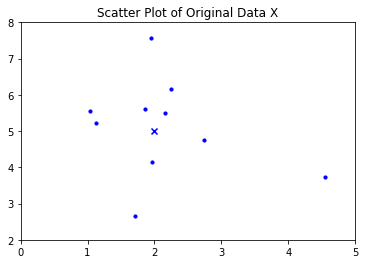

In [14]:
# Scatter Plot of original data
fig41, ax41 = plt.subplots()
sc41= ax41.scatter(syntheticData41[:,0], 
                  syntheticData41[:,1], 
                  marker='o', 
                  color='blue',
                  s = 10)
ax41.scatter( 2, 5, marker='x', color='blue')

ax41.set_xlim(0, 5)
ax41.set_ylim(2, 8)
plt.title('Scatter Plot of Original Data X')
plt.show()

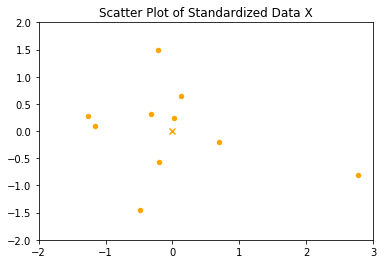

In [15]:
# Scatter Plot of the standardized data
fig42, ax42 = plt.subplots()
sc42=ax42.scatter(syntheticData41_standardize[:,0], 
                 syntheticData41_standardize[:,1], 
                 marker='o', 
                 color='orange',
                 s = 20)
ax42.scatter( 0, 0, marker='x', color='orange')

ax42.set_xlim(-2, 3)
ax42.set_ylim(-2, 2)
plt.title('Scatter Plot of Standardized Data X')
plt.show()

#### Compared the scater plot of original data X with standardized data X_hat, the pattern of those two datasets do not change, but the scale and center location changed.